In [1]:
import os
import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

In [2]:
total_df = pd.read_csv('/root/Mag/OriginalData/Taipei101/Survey/20220315_101_B3/location_20220315_101_POINT1_FSTREET/magSim3/Mag_0_new@20220315152643.csv')

In [3]:
def calculate_Para(start_wgs84: tuple([float, float])):
    wgs84_a = 6378137.0
    wgs84_b = 6356752.3142
    wgs84_e2 = (1 - (wgs84_b / wgs84_a) * (wgs84_b / wgs84_a))
    R3 = np.power((1.0 - wgs84_e2 * np.power(np.sin(start_wgs84[0]), 2)), 3)
    R2 = np.power(np.sin(start_wgs84[0]), 2)
    
    high = 0
    Lat2Y = high + wgs84_a * (1 - wgs84_e2) / np.sqrt(R3)
    Lon2X = (high + wgs84_a / np.sqrt(1 - wgs84_e2 * R2)) * np.cos(start_wgs84[0])
    
    return Lat2Y, Lon2X

class PositionConverter:
    def __init__(self, original_position):
        self.original_position = original_position
    
    def execute(self, lat: list[float], lon: list[float]):
        assert len(lat) == len(lon)
        
        start_wgs84 = np.deg2rad([self.original_position[0], self.original_position[1]])  # start_wgs84: 自訂原點座標(經緯度)
        Lat2Y, Lon2X = calculate_Para(start_wgs84)

        converted_y = (np.deg2rad(lat) - start_wgs84[0]) * Lat2Y
        converted_x = (np.deg2rad(lon) - start_wgs84[1]) * Lon2X

        return converted_y, converted_x

In [4]:
position_converter = PositionConverter(original_position=(total_df.lat.min(), total_df.lon.min()))
converted_y, converted_x = position_converter.execute(total_df.lat, total_df.lon)
total_df['cord_y'] = converted_y
total_df['cord_x'] = converted_x
total_df['is_turning'] = [False] * len(total_df)

In [5]:
for i in range(len(total_df)):
    if total_df.iloc[i].is_turning == True: 
        print(i)
        break 

In [6]:
total_df.is_turning = False

In [7]:
def is_number(value):
    try:
        int(value)
        return True
    except:
        return False

 0


step: 405


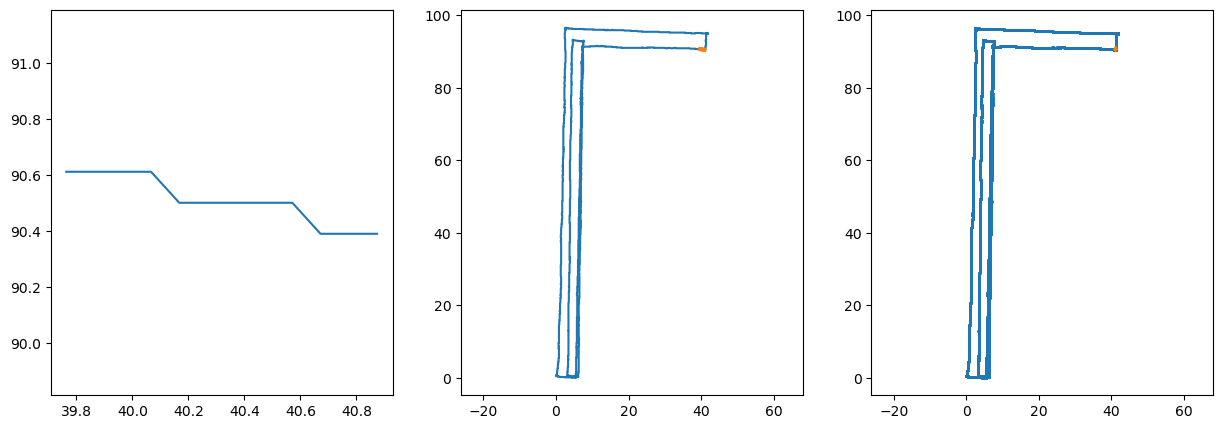

In [ ]:
from IPython.display import display, clear_output
Range = 25
front_idx = 0
current_idx = Range
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

while (True):
    print(f'step: {current_idx}')
    
    x = total_df.cord_x[current_idx-Range:current_idx+Range]
    y = total_df.cord_y[current_idx-Range:current_idx+Range]
    ax1.cla()
    ax1.set_aspect('equal', adjustable='datalim')
    ax1.plot(x, y)
    
    ax2.cla()
    ax2.set_aspect('equal', adjustable='datalim')
    ax2.plot(total_df.cord_x, total_df.cord_y)
    ax2.plot(x, y, linewidth=3)
    
    ax3.cla()
    ax3.set_aspect('equal', adjustable='datalim')
    ax3.scatter(total_df.cord_x, total_df.cord_y, s=1)
    ax3.scatter(total_df.cord_x, total_df.cord_y, s=np.array((total_df.is_turning == True).values, float))
    
    display(fig)
    clear_output(wait=True)
    is_turning = input()
    
    if is_turning == '0':
        total_df.is_turning[current_idx-Range:current_idx+Range] = [False] * 50
        current_idx += 20
    elif is_turning == '1':
        total_df.is_turning[current_idx-Range:current_idx+Range] = [True] * 50
        current_idx += 20
    elif is_turning == '-1':
        temp_idx = current_idx
        current_idx = front_idx
        front_idx = temp_idx
    elif is_number(is_turning):
        front_idx = current_idx
        current_idx = (current_idx + int(is_turning)) % len(total_df)
    else:
        break
    
    plt.pause(0.5)

In [23]:
import ipywidgets as widgets

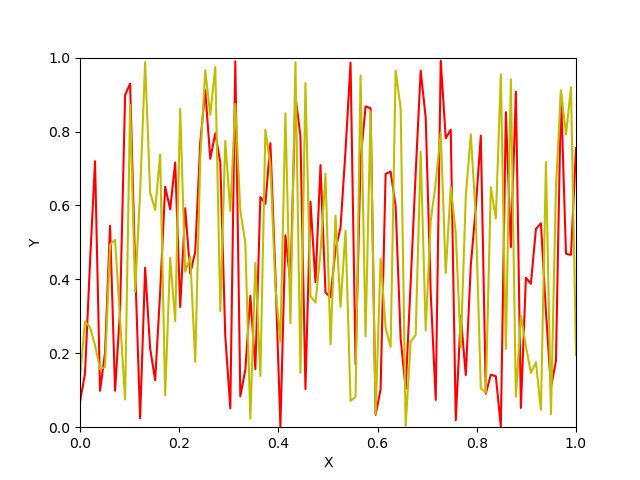

In [24]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['r', 'y'])
    time.sleep(1)

In [25]:
def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show()

In [26]:
data = collections.defaultdict(list)
for i in range(100):
    data['foo'].append(np.random.random())
    data['bar'].append(np.random.random())
    data['baz'].append(np.random.random())
    live_plot(data)

NameError: name 'collections' is not defined

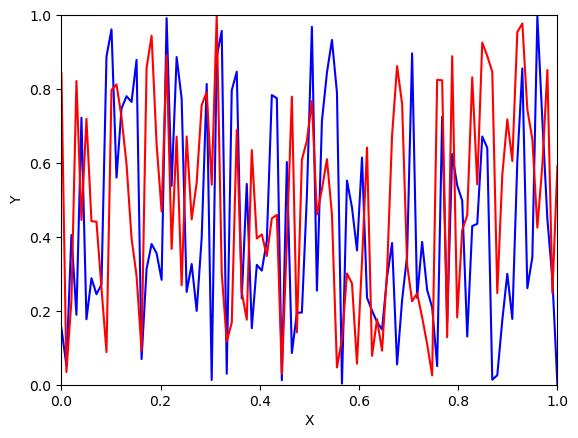

In [27]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import time

from IPython import display

def pltsin(ax, *,hdisplay, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    hdisplay.update(fig)


fig, ax = plt.subplots(1,1)
hdisplay = display.display("", display_id=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, colors=['b', 'r'], hdisplay=hdisplay)
    time.sleep(1)
    
plt.close(fig)

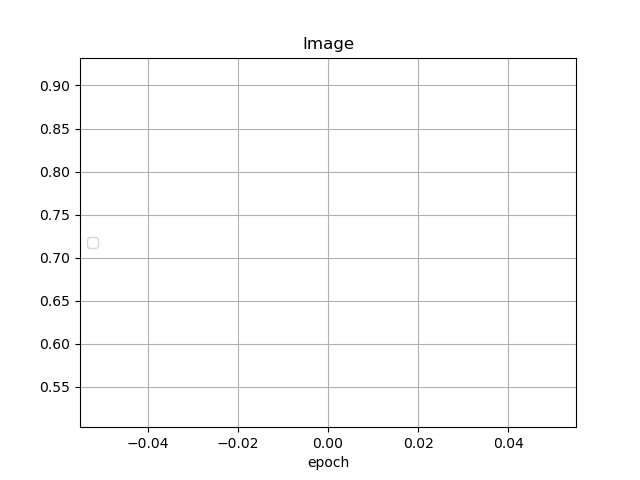

In [28]:
import collections

from IPython.display import Markdown, clear_output
from IPython import display
import ipywidgets as widgets


def live_plot(data_dict, figsize=(7,5)):
    clear_output(wait=True)
    
    for label, data in data_dict.items():
        ax.plot(data, label=label)
    
    hdisplay.update(fig)

fig, ax = plt.subplots(1, 1)
ax.set_title('Image')
ax.grid(True)
ax.set_xlabel('epoch')
ax.legend(loc='center left') # the plot evolves to the right
hdisplay = display.display("", display_id=True)

data = collections.defaultdict(list)

yes_button = widgets.Button(description='Yes')
no_button = widgets.Button(description='No')
output = widgets.Output()

def activate():
    data['foo'].append(np.random.random())
    data['bar'].append(np.random.random())
    data['baz'].append(np.random.random())
    live_plot(data)

def on_yes_button_clicked(_):
    activate()
    # "linking function with output"
    with output:
        # what happens when we press the button
        clear_output()
        print('Yes')
        
def on_no_button_clicked(_):
    activate()
    # "linking function with output"
    with output:
        # what happens when we press the button
        clear_output()
        print('No')
        
yes_button.on_click(on_yes_button_clicked)
no_button.on_click(on_no_button_clicked)

activate()
widgets.VBox([widgets.HBox([yes_button, no_button]), output])

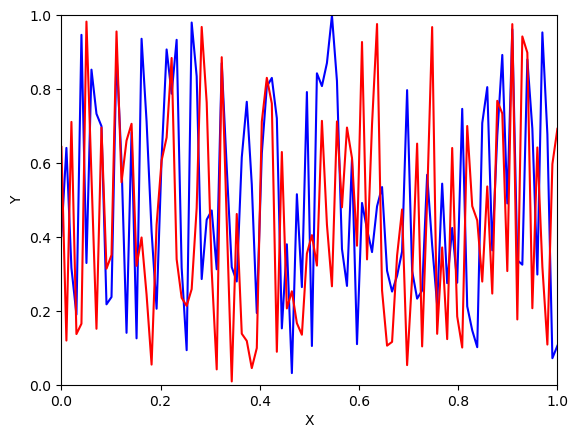

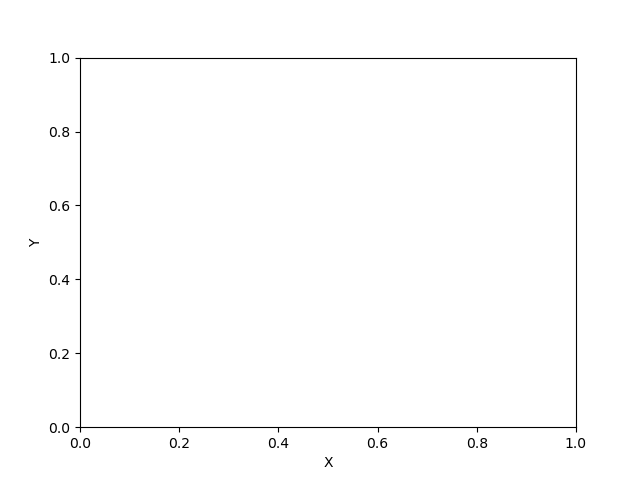

In [2]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import time

from IPython.display import Markdown, clear_output
from IPython import display
import ipywidgets as widgets

def pltsin(ax, *,hdisplay, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    hdisplay.update(fig)


fig, ax = plt.subplots(1, 1)
hdisplay = display.display("", display_id=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
    
def on_yes_button_clicked(_):
    pltsin(ax, colors=['b', 'r'], hdisplay=hdisplay)
    # "linking function with output"
    with output:
        # what happens when we press the button
        clear_output()
        print('Yes')
        
def on_no_button_clicked(_):
    pltsin(ax, colors=['b', 'r'], hdisplay=hdisplay)
    # "linking function with output"
    with output:
        # what happens when we press the button
        clear_output()
        print('No')


yes_button = widgets.Button(description='Yes')
no_button = widgets.Button(description='No')
output = widgets.Output()
    
yes_button.on_click(on_yes_button_clicked)
no_button.on_click(on_no_button_clicked)

In [3]:
widgets.VBox([widgets.HBox([yes_button, no_button]), output])

In [11]:
# def distance_cal(ax, ay, bx, by):
#     return (abs(ax - bx) ** 2 + abs(ay - by) ** 2) ** 0.5

# def time_to_meter(df):
#     meter = pd.DataFrame(columns=['magN', 'magE', 'magD', 'cord_y', 'cord_x', 'LL_Heading'])
#     pointer = 0
#     for i in range(len(df)):
#         if distance_cal(df.iloc[pointer].cord_x, df.iloc[i].cord_x, df.iloc[pointer].cord_y, df.iloc[i].cord_y) >= 0.3:
#             pointer = i
#             meter.append(
#                 {'magN' : df.iloc[], 'Scores' : 97, 'Questions' : 2200}, 
#                 ignore_index = True)


5.0


In [14]:
a = total_df.iloc[0]
a

UTC           1.647330e+09
magN          3.541884e+01
magE         -1.433835e+01
magD          3.891441e+01
lat           2.503459e+01
lon           1.215645e+02
height       -2.556613e+00
roll          5.628800e-02
pitch         3.357240e-01
heading      -1.319320e-01
LL_Heading    0.000000e+00
cord_y        9.504357e+01
cord_x        4.137823e+01
Name: 0, dtype: float64